In [87]:
#importing necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')

In [88]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')

In [89]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [91]:
df.shape

(4177, 9)

In [92]:
#In order to get Age we have to add 1.5 years in Rings as per problem statement.
#Rings / integer / -- / +1.5 gives the age in years.
#Dropping Rings column from dataset otherwise linear Regression will give 100% accuracy. Even we don't need Rings anymore.
df['Age'] = df['Rings'] + 1.5
df.drop('Rings', axis = 1, inplace = True)

# Univariate Analysis

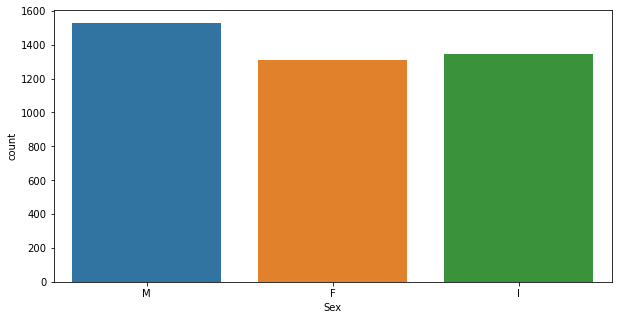

In [93]:
plt.figure(figsize=(10,5))
sns.countplot(df['Sex'])
plt.show()

In the above graph three types of sec are present i.e M=male, F= Female and I= Infant. Where, Male are more the famale and Infant

# Multivariate analysis

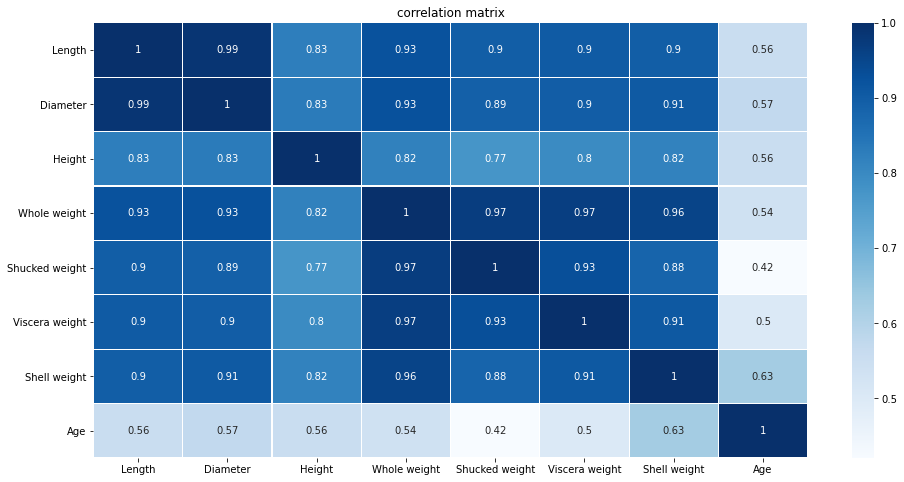

In [94]:
fig=plt.figure(figsize=(16,8))
hc=df.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues",linewidths=.1, annot_kws={"size": 10})
plt.title("correlation matrix")
plt.show()

From the above graph we come to know that each attributes has good correlation with the Age 

# Finding the correlation with the age with all the attributes

<AxesSubplot:title={'center':'Correlation with Age Graph'}>

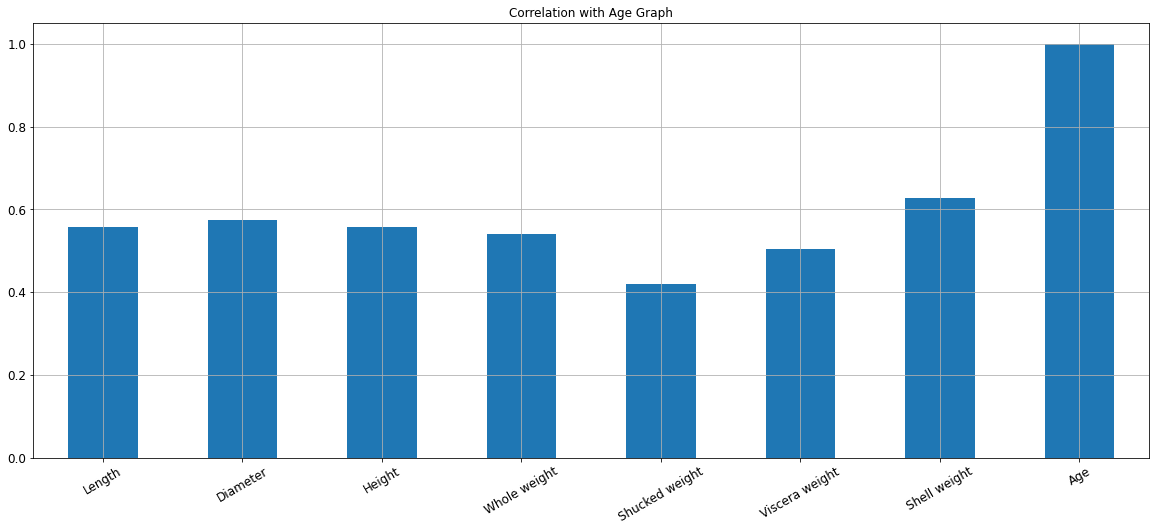

In [95]:
df.corrwith(df.Age).plot.bar(
        figsize = (20, 8), title = "Correlation with Age Graph", fontsize = 12,
        rot = 30, grid = True)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

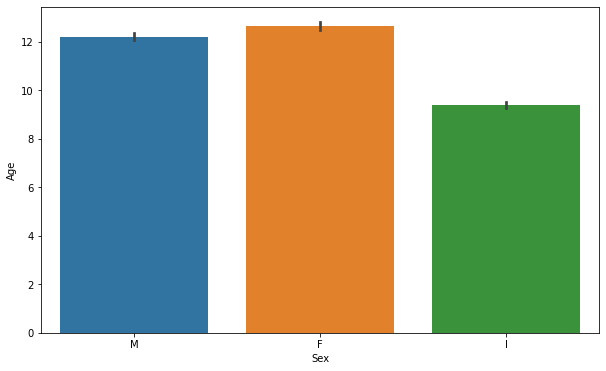

In [96]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Sex', y = 'Age', data = df)

The Age of F is more than M and I.

<AxesSubplot:xlabel='Age', ylabel='Length'>

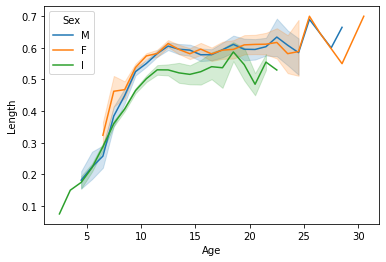

In [97]:
# Plot the responses for different Age and Length
sns.lineplot(x="Age", y="Length",
             hue="Sex",
             data=df)

In [98]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
#Label Encoding for Sex because it's object type and we can't process it.
le = preprocessing.LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [99]:
#One hot encoding becuase we don't have more number of columns
y1 = pd.get_dummies(df.Sex, prefix='Sex')
print(y1.head())

   Sex_0  Sex_1  Sex_2
0      0      0      1
1      0      0      1
2      1      0      0
3      0      0      1
4      0      1      0


In [100]:
df1=df

# Get one hot encoding of columns Sex
one_hot = pd.get_dummies(df1['Sex'], prefix='Sex')
# Drop column Sex as it is now encoded
df1 = df1.drop('Sex',axis = 1)
# Join the encoded Abalones
df1 = df1.join(one_hot)

df = df1 
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Sex_0,Sex_1,Sex_2
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5,1,0,0


# DATA CLEANING

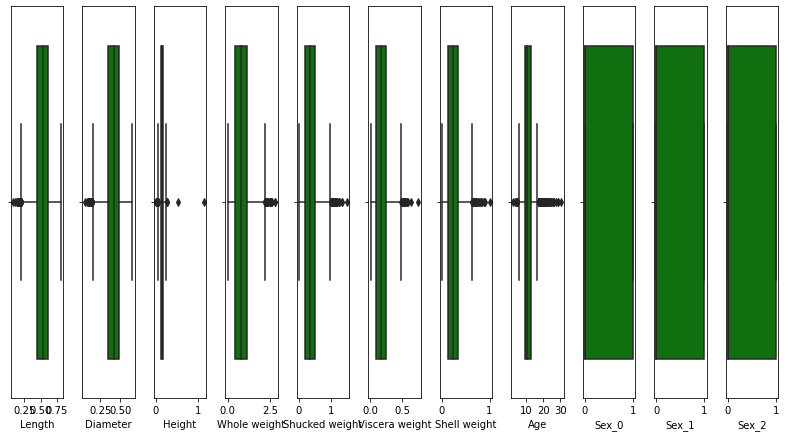

In [102]:
#Visualising the outliers
collist=df.columns.values
ncol=12
nrows=10
plt.figure(figsize=(ncol,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [103]:
#Moved Age i.e. target variable at last
x=df.pop('Age')
df['Age']=x
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_0,Sex_1,Sex_2,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0,8.5
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0,12.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0,11.5


In [105]:
##Removing the outliers

from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [110]:
#checking the shape of the data
#df=Abalone
df=df1[(z<3).all(axis = 1)]
print(df1.shape)
print(df.shape)

(4177, 11)
(4027, 11)


In [111]:
#checking for how much data we lost
loss_percent=(4177-4027)/4177*100
print(loss_percent)

3.5910940866650707


we lost almost 3.5% of our data. So we can procced.

# Seprate independent variable and target variable

In [112]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [113]:
#changing the shape of target variable
y=np.ravel(y)

# Removing Skewness

In [114]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
#adding the columns heading
df_new=pd.DataFrame(df_new,columns=x.columns)
x=df_new
x.skew()

Length           -0.082985
Diameter         -0.080956
Height           -0.015962
Whole weight     -0.016797
Shucked weight    0.021815
Viscera weight    0.035902
Shell weight      0.016660
Sex_0             0.821149
Sex_1             0.731618
Sex_2             0.576507
dtype: float64

Now the skewness is good for all the columns

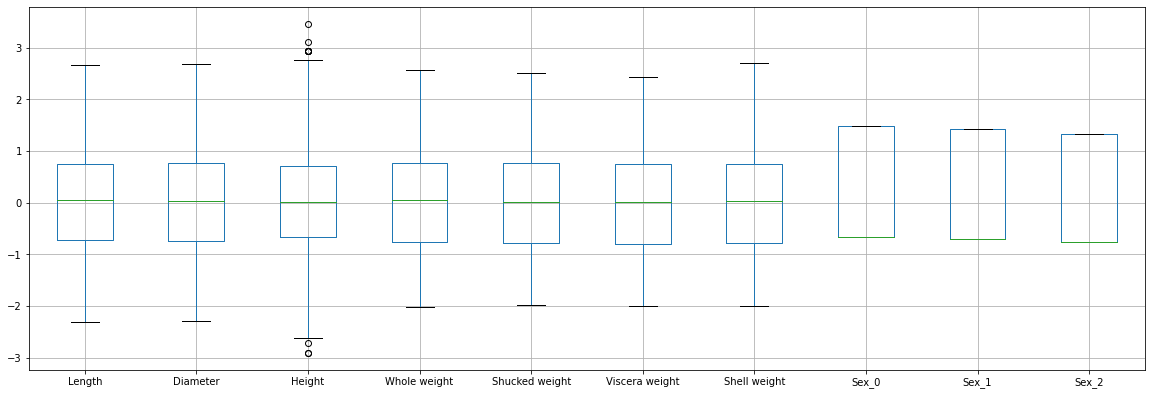

In [115]:
#Checking the outliers again
x.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

# Finding Best Random State

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    score = r2_score(y_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.5555685791439039  on Random_state  82


# Train Test Split

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Finding Best Algorithm

In [118]:
#Linear Regression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np
LR = LinearRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print("R2 Score:                ", r2_score(y_test,predlr))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,predlr))
print("Mean Squared error:      ", mean_squared_error(y_test,predlr))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,predlr)))

R2 Score:                 0.5555685791439039
Mean Absolute Error:      1.457253621013387
Mean Squared error:       3.8190786085494053
Root Mean Squared Error:  1.9542463019152436


In [119]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("R2 Score:                ", r2_score(y_test,predrf))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,predrf))
print("Mean Squared error:      ", mean_squared_error(y_test,predrf))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,predrf)))

R2 Score:                 0.5602079985121595
Mean Absolute Error:      1.4291645988420183
Mean Squared error:       3.7792112489660874
Root Mean Squared Error:  1.9440193540616018


In [120]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("R2 Score:                ", r2_score(y_test,preddt))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,preddt))
print("Mean Squared error:      ", mean_squared_error(y_test,preddt))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,preddt)))

R2 Score:                 0.17952888128691835
Mean Absolute Error:      1.9172870140612077
Mean Squared error:       7.050454921422664
Root Mean Squared Error:  2.6552692747483566


In [121]:
from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor()
KNR.fit(x_train,y_train)
preddt=KNR.predict(x_test)
print("R2 Score:                ", r2_score(y_test,preddt))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,preddt))
print("Mean Squared error:      ", mean_squared_error(y_test,preddt))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,preddt)))

R2 Score:                 0.4986925314832563
Mean Absolute Error:      1.502398676592225
Mean Squared error:       4.3078246484698095
Root Mean Squared Error:  2.075529968097259


In [122]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
preddt=GBR.predict(x_test)
print("R2 Score:                ", r2_score(y_test,preddt))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,preddt))
print("Mean Squared error:      ", mean_squared_error(y_test,preddt))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,preddt)))

R2 Score:                 0.573518212624298
Mean Absolute Error:      1.3949192790778822
Mean Squared error:       3.664834200887527
Root Mean Squared Error:  1.914375668693981


In [123]:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge.fit(x_train,y_train)
preddt=Ridge.predict(x_test)
print("R2 Score:                ", r2_score(y_test,preddt))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,preddt))
print("Mean Squared error:      ", mean_squared_error(y_test,preddt))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,preddt)))

R2 Score:                 0.5547230672984391
Mean Absolute Error:      1.458266468555204
Mean Squared error:       3.826344242909977
Root Mean Squared Error:  1.956104353788411


In [124]:
from sklearn.svm import SVR
Svr = SVR()
Svr.fit(x_train,y_train)
preddt=Svr.predict(x_test)
print("R2 Score:                ", r2_score(y_test,preddt))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,preddt))
print("Mean Squared error:      ", mean_squared_error(y_test,preddt))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,preddt)))

R2 Score:                 0.5547744164610007
Mean Absolute Error:      1.3895011224962048
Mean Squared error:       3.825902990381234
Root Mean Squared Error:  1.9559915619401926


LinearRegression, RandomForestRegressor, GradientBoostingRegressor and SVR have highest Accuracy Score, it's maybe because of overfitting.

To find best algorithm, need to check cross_val_score.

# Cross Validation

In [125]:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),SVR()]
name=["LinearRegression","RandomForestRegressor","DecisionTreeRegressor","KNeighborsRegressor","GradientBoostingRegressor","SVR"]
for i in model:
    scr=cross_val_score(i ,x , y, cv=5)
    print("Cross validation score of",i,scr.mean())

Cross validation score of LinearRegression() 0.4413134432328505
Cross validation score of RandomForestRegressor() 0.4600777037601141
Cross validation score of DecisionTreeRegressor() -0.05729526872412214
Cross validation score of KNeighborsRegressor() 0.3994103738075611
Cross validation score of GradientBoostingRegressor() 0.4755872774067109
Cross validation score of SVR() 0.4888241346563208


Cross validation Acore of SVR is near to it's Accuracy Score. So we'll conclude that SVR have highest accuracy

# Hyper Parameter Tuning

In [126]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel' :['linear', 'poly', 'rbf', 'sigmoid'],
             'gamma' :['scale', 'auto']}
#parameters = {'fit_intercept':['bool','default=True'],
#             'normalize':['bool','default=True']}

clf = GridSearchCV(SVR(), parameters)
clf.fit(x_train,y_train)
clf.best_params_  #Best parameters

{'gamma': 'scale', 'kernel': 'rbf'}

In [127]:
clf_pred = clf.best_estimator_.predict(x_test)

In [128]:
r2_score(y_test, clf_pred)

0.5547744164610007

Our model learnt 55%

# Saving the model

In [129]:
import joblib
joblib.dump(clf.best_estimator_,"PJ4_Abalone.pkl")
SVR_from_joblib=joblib.load('PJ4_Abalone.pkl')
Predicted = SVR_from_joblib.predict(x_test)
Predicted

array([12.54388911, 11.31249998, 12.31233775, ..., 12.17527841,
        6.1342769 ,  6.69101193])

In [130]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([SVR_from_joblib.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

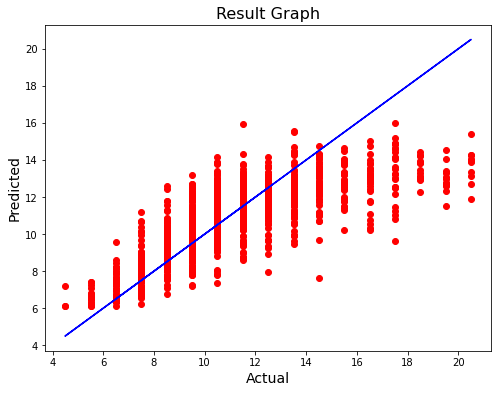

In [131]:
#Final output Graph
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=Predicted,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title("Result Graph",fontsize=16)
plt.show()